In [7]:
#Useful packages
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Para generar un dataset mediante gensvmdat, entra a la terminal y ejecuta "wsl.exe -d Ubuntu", esto hará que entres en una máquina virtual de Linux. Después, ejecuta "./gensvmdat data.txt 500 42", donde el primer argumento es el archivo de salida, el segundo el tamaño del dataset y el tercero la seed de aleatoriedad. Esto genera el archivo **raw_data_ex1.txt**. Este archivo aún no puede ser procesado por AMPL. Para que lo sea, tienes que ejecutar la siguiente función, que lee el archivo y genera dos archivo .dat que AMPL puede leer. Uno de ellos se llama **data_primal_ex1.dat** y es para el problema primal y otro se llama **data_dual_ex1.dat** y es para el problema dual. Ambos tienen 180 observaciones, y las otras 20 son para test y son devueltas. 




In [ ]:

def txt_to_ampl_dual():
    """Procesa 'raw_data_ex1.txt' y genera dos archivos .dat para AMPL:
    - 'data_primal_ex1.dat' para el problema primal con matriz A y etiquetas y
    - 'data_dual_ex1.dat' para el problema dual con matriz de Gram K y etiquetas y
    También devuelve A, y, X_train, y_train, X_test, y_test y los asteriscos."""

    entrada = "raw_data_ex1.txt"

    with open(entrada, "r") as f:
        lines = [line.strip() for line in f if line.strip()]

    total_m = len(lines)
    n = len(lines[0].split()) - 1

    # Cargamos todos los datos
    A_all = np.zeros((total_m, n))
    y_all = np.zeros(total_m)
    asteriscos = []

    for i, line in enumerate(lines):
        parts = line.split()
        features = parts[:-1]
        label = parts[-1]
        if label[-1] == "*":
            label = label[:-1]
            asteriscos.append(i)
        A_all[i] = [float(x) for x in features]
        y_all[i] = float(label)

    # Dividir en train (180) y test (20)
    m = 180
    A = A_all[:m]
    y = y_all[:m]
    X_test = A_all[m:]
    y_test = y_all[m:]

    # Archivo para el problema primal
    with open("data_primal_ex1.dat", "w") as out:
        out.write(f"param m := {m};\n")
        out.write(f"param n := {n};\n\n")
        
        out.write("param A : " + " ".join(str(j+1) for j in range(n)) + " :=\n")
        for i in range(m):
            out.write(f"{i+1} " + " ".join(f"{A[i, j]:.6f}" for j in range(n)) + "\n")
        out.write(";\n\n")
        
        out.write("param y :=\n")
        for i in range(m):
            out.write(f"{i+1} {int(y[i])}\n")
        out.write(";\n")

    # Matriz de Gram para el problema dual
    K = A @ A.T

    with open("data_dual_ex1.dat", "w") as out_dual:
        out_dual.write(f"param m := {m};\n\n")
        
        out_dual.write("param y :=\n")
        for i in range(m):
            out_dual.write(f"{i+1} {int(y[i])}\n")
        out_dual.write(";\n\n")

        out_dual.write("param K : " + " ".join(str(j+1) for j in range(m)) + " :=\n")
        for i in range(m):
            out_dual.write(f"{i+1} " + " ".join(f"{K[i, j]:.6f}" for j in range(m)) + "\n")
        out_dual.write(";\n")
    
    return A, y, X_test, y_test, asteriscos

X_train, y_train, X_test, y_test, asteriscos = txt_to_ampl_dual()

Ahora ejecutamos las cosas con AMPL y se generan los archivos **resultados_svm.txt** y **resultados_svm_dual.txt**. Vamos primero con el primal, el resultado es este: 

**w = [2.641012, 2.190995, 3.077770, 2.387208]**


**gamma = -5.171698**

In [1]:

w = [4.607432, 3.953014, 4.810140, 4.575938, ];

gamma = -9.014264;

s = [0.000000, 0.806443, 0.000000, 1.051930, 0.065341, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.142922, 0.000000, 0.000000, 0.040360, 0.000000, 0.000000, 0.000000, 0.056224, 0.099930, 1.557888, 1.789226, 0.000000, 0.655269, 0.000000, 0.000000, 0.000000, 0.000000, 0.197897, 0.000000, 0.418106, 3.760739, 0.000000, 0.000000, 0.000000, 0.000000, 0.097705, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.925325, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.525286, 0.000000, 0.000000, 0.000000, 0.331748, 0.000000, 0.000000, 0.374784, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.140285, 0.000000, 0.963991, 0.767162, 0.209336, 0.000000, 1.750738, 0.000000, 0.083038, 0.000000, 0.000000, 1.030862, 0.000000, 0.480879, 0.000000, 0.379273, 0.000000, 0.000000, 0.000000, 0.000000, 0.579179, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.234196, 0.000000, 0.000000, 0.829952, 0.179478, 0.000000, 0.000000, 0.000000, 0.000000, 0.644969, 1.612876, 1.242553, 0.000000, 0.000000, 4.375851, 5.092057, 0.000000, 0.000000, 0.248827, 0.000000, 0.578481, 0.000000, 0.702137, 0.000000, 0.000000, 0.000000, 0.135526, 0.000000, 0.288988, 0.000000, 0.000000, 1.086018, 0.000000, 0.140619, 0.000000, 0.847527, 2.640831, 0.000000, 0.000000, 0.348343, 0.000000, 0.000000, 0.288120, 0.272540, 4.786444, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.598170, 0.613018, 0.000000, 0.627416, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.188309, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.930819, 0.330725, 0.000000, 0.000000, 0.517358, 2.897804, 0.000000, 0.000000, 0.000000, 0.379188, 1.062393, 0.000000, 0.000000, 0.849877, ];


La siguiente función recibe una lista de slacks y hace un gráfico de barras, pintando de rojo los que tenían asteriscos

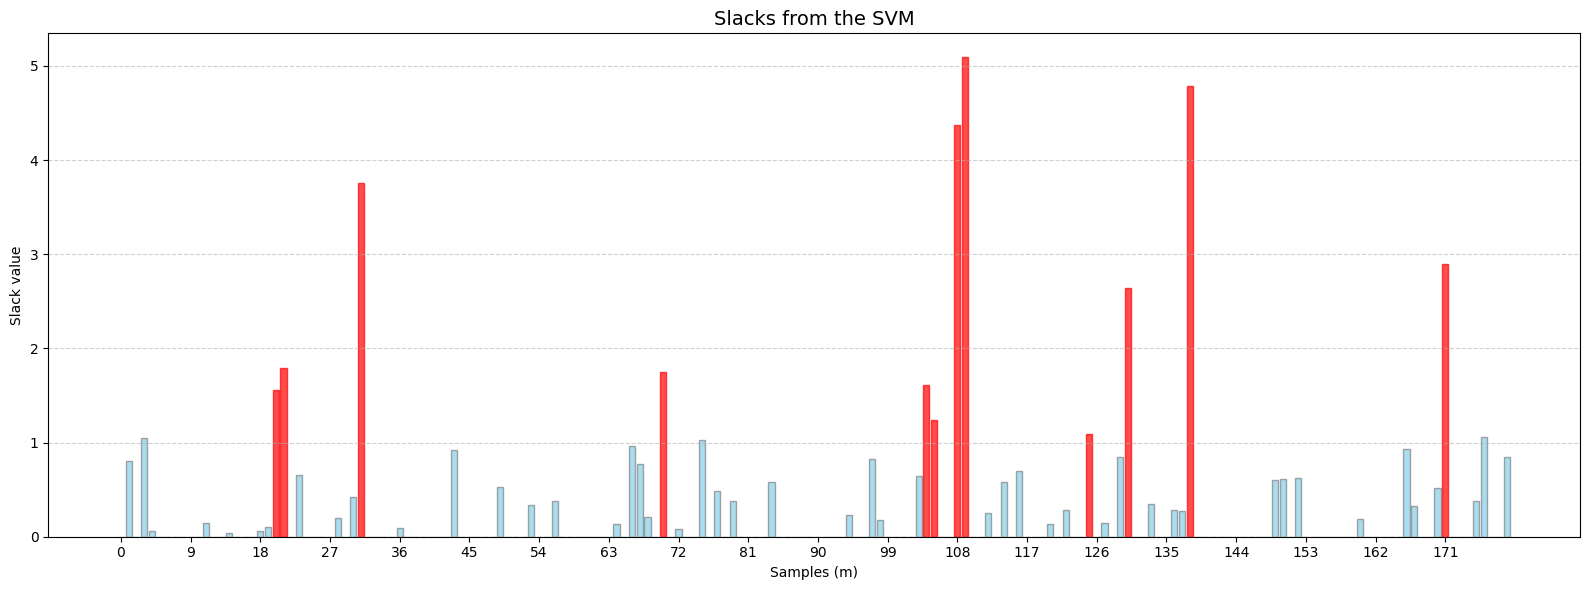

En total hay 180 slacks, de los cuales:
Hay 120 que valen cero, es decir, que están perfectamente clasificados. (66.667 %)
Hay 45 que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. (25.0 %)
Hay 15 que son mayores a 1, es decir, que están mal clasificados. (8.333 %)
Por tanto, la accuracy es del 91.667 %


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def plot_slacks(slacks: list[float], asteriscos: list[int] = [], 
                title: str = "Slacks from the SVM", xlabel: str = "Samples (m)", 
                ylabel: str = "Slack value", figsize: tuple = (16, 6)):
    """
    Dibuja un gráfico de barras de los slacks, resaltando los índices en `asteriscos` con color rojo.
    """
    if asteriscos is None:
        asteriscos = []
    
    m = len(slacks)
    indices = np.arange(m)
    
    plt.figure(figsize=figsize)
    
    # Gráfico de barras
    bars = plt.bar(indices, slacks, color='skyblue', edgecolor='gray', alpha=0.7)
    
    # Resaltar slacks en `asteriscos`
    for idx in asteriscos:
        if idx < m:
            bars[idx].set_color('red')
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    

    if m > 50:
        plt.xticks(np.arange(0, m, max(1, m // 20)))
    
    plt.tight_layout()
    plt.show()

    #Printear la accuracy y demás
    perfect = len([si for si in slacks if si==0])
    meh = len([si for si in slacks if (si<1) and (si>0)])
    bad = len([si for si in slacks if si>=1])

    print(f"En total hay {m} slacks, de los cuales:" )
    print(f"Hay { perfect } que valen cero, es decir, que están perfectamente clasificados. ({round(100*perfect/m, 3)} %)")
    print(f"Hay { meh } que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. ({round(100*meh/m, 3)} %)")
    print(f"Hay { bad } que son mayores a 1, es decir, que están mal clasificados. ({round(100*bad/m, 3)} %)")
    print(f"Por tanto, la accuracy es del {round(100*( perfect+meh )/m, 3)} %")



plot_slacks(s, asteriscos)

Ahora queremos ver la performance para test. Para ello no usamos slacks, sino los parámetros r_i. Para calcular los 20 r_i's necesitamos los puntos de test así como el hiperplano, es decir, w y gamma. En el caso anterior, los asteriscos eran [20, 21, ... 171, 189, 190], pero como ahora solo tenemos en cuenta los últimos 20 puntos, solo nos importan los dos últimos índices, [189, 190], que si le restamos 180 son [9, 10]. La siguiente función lo hace: 

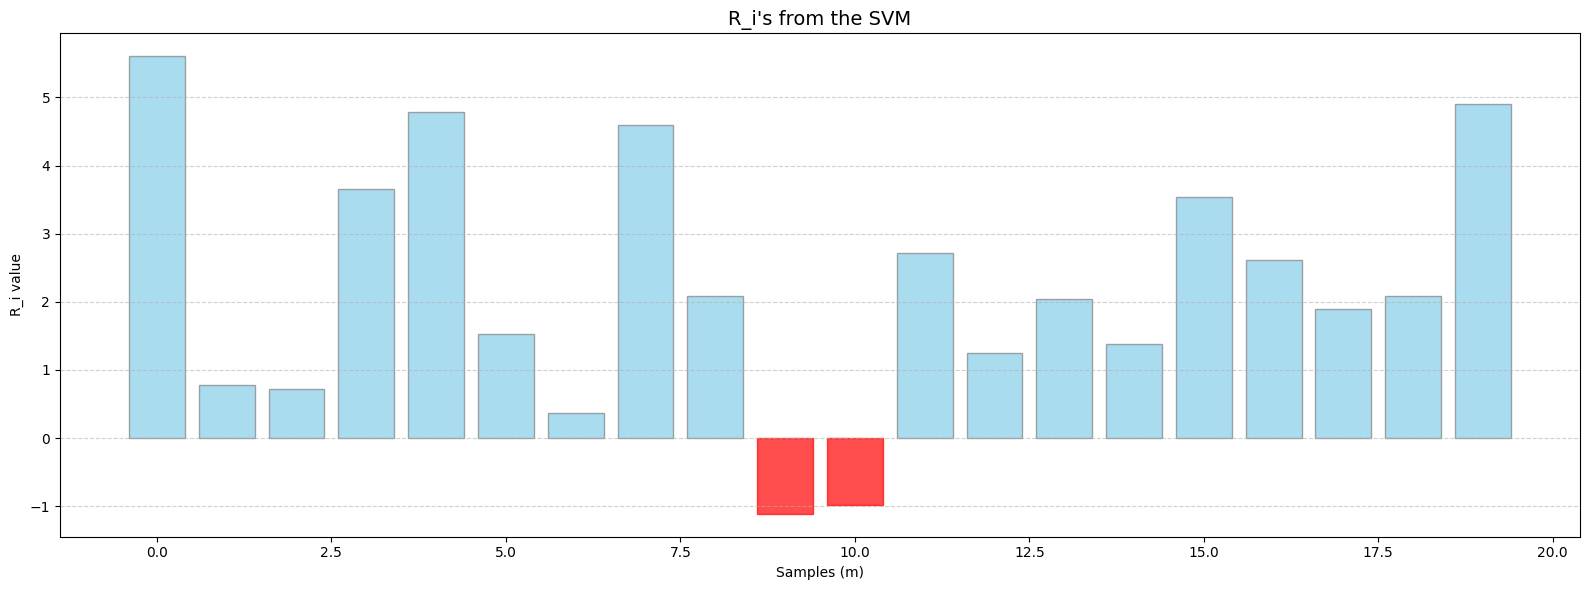

En total hay 20 ris, de los cuales:
Hay 15 mayores a uno, que están perfectamente clasificados. (75.0 %)
Hay 3 que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. (15.0 %)
Hay 2 que son menores a cero, es decir, que están mal clasificados. (10.0 %)
Por tanto, la accuracy es del 90.0 %


In [31]:

def plot_test_ris( test_points:list[list[float]], y:list[float], w:list[float], gamma:float, asteriscos: list[int] = [], 
                title: str = "R_i's from the SVM", xlabel: str = "Samples (m)", 
                ylabel: str = "R_i value", figsize: tuple = (16, 6)):


    # Calcular ri para TODOS los puntos (no solo 20)
    ris = [(sum(test_points[i][j] * w[j] for j in range(4)) + gamma) * y[i] 
              for i in range(len(test_points))]
    
    m = len(test_points)
    indices = np.arange(m) 
    
    plt.figure(figsize=figsize)
    bars = plt.bar(indices, ris, color='skyblue', edgecolor='gray', alpha=0.7)
    
    # Resaltar ris con asteriscos
    for idx in asteriscos:
        if idx < m:
            bars[idx].set_color('red')
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    
    plt.tight_layout()
    plt.show()
    

    m = len(ris)
    perfect = len([ri for ri in ris if ri>=1])
    meh = len([ri for ri in ris if (ri<1 and ri>0)])
    bad = len([ri for ri in ris if ri<=0])

    print(f"En total hay {m} ris, de los cuales:" )
    print(f"Hay { perfect } mayores a uno, que están perfectamente clasificados. ({round(100*perfect/m, 3)} %)")
    print(f"Hay { meh } que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. ({round(100*meh/m, 3)} %)")
    print(f"Hay { bad } que son menores a cero, es decir, que están mal clasificados. ({round(100*bad/m, 3)} %)")
    print(f"Por tanto, la accuracy es del {round(100*(perfect+meh)/m, 3)} %")

    return ris


asteriscos2 =  [9, 10]
ris = plot_test_ris( X_test, y_test, w, gamma, asteriscos2 )

La solución del problema dual no es w, gamma y slacks, sino las gammas multiplicadoras de lagrange. Para reconstruir w tenemos esta función, que lee dos archivos: Uno con el dataset original (X e y) y otro con el resultado de AMPL que contiene el valor de las variables de lagrange lambdas. 

In [17]:


lambdas = [0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.395326, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.580277, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.975610, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000007, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, ];


def reconstruir_w(lambdas, X_train, y_train):
    """Reconstruye el vector w a partir de los lambdas, X_train y y_train."""
    
    lambdas = np.array(lambdas)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    if not (len(lambdas) == len(X_train) == len(y_train)):
        raise ValueError("Todos los vectores deben tener la misma longitud.")
    
    w = np.sum((lambdas * y_train)[:, None] * X_train, axis=0)

    print("Vector w reconstruido:")
    print(w)
    return w

w_dual = reconstruir_w(lambdas, X_train, y_train)


Vector w reconstruido:
[2.64103472 2.19098419 3.07777899 2.38718788]


El resultado que nos ha dado es: 

**w_dual = [2.64103472 2.19098419 3.07777899 2.38718788]**

Muy bien, es muy parecido al de antes. Ahora vamos a intentar encontrar gamma. En el resultado del problema dual, los puntos con lambdas entre cero y uno son los de índices 62 y 157, estos son los support vectors. A partir del dataset y todo eso vemos que: 


In [79]:
idx1, idx2 = 62, 157
x1, x2 = np.array([0.168000, 0.102000, 0.574000, 0.728000]), np.array([0.116000, 0.828000, 0.975000, 0.440000])
y1, y2 = -1, 1

gamma1 = y1 - np.dot( w_dual,  x1 )
gamma2 = y2 - np.dot( w_dual,  x2 )

print(gamma1)
print(gamma2)

-5.171692133556001
-5.171692112683999


La gamma tambien da lo mismo, por tanto todo funciona bien

Dado un cierto w, esta función calcula el ancho del margen de los hiperplanos. 

In [32]:

def svm_width(w:list[float]) -> float:
    return 2 / sum( wi*wi for wi in w )

print(svm_width(w))
print(svm_width(w_dual))


0.024712285755601807
0.07422013507137075
